In [2]:
import scanpy as sc
import anndata as ad
import seaborn as sns
import torch
import tempfile
import scvi

In [6]:
!ls ../scanpy_plus/

__init__.py     data            globimport.py   magics.py       recipe
__pycache__     describe.py     io              pl              tl
ai              get_from_raw.py is_outlier.py   pp


In [8]:
import sys
sys.path.append('../scanpy_plus/')
import scanpy_plus as scp

In [9]:
adata = scvi.data.heart_cell_atlas_subsampled()
adata

INFO     File data/hca_subsampled_20k.h5ad already downloaded                                                      


AnnData object with n_obs × n_vars = 18641 × 26662
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'n_counts'
    uns: 'cell_type_colors'

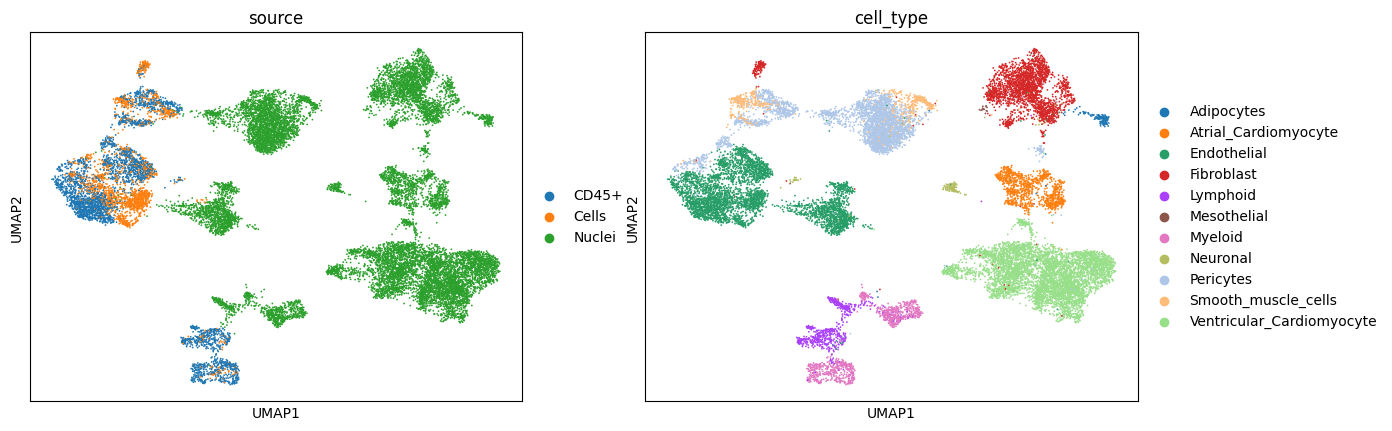

In [10]:
# General preprocessing. Not specific to scanpy_plus
sc.pp.filter_genes(adata, min_counts=3)
adata.layers["counts"] = adata.X.copy()
adata.raw = adata # Generally this is not recommended for raw counts, but for simplicity in this tutorial we do it.
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,  n_top_genes=2000, subset=True, batch_key="source")
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=15)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["source", "cell_type"])

In [ ]:
scp.pp.